# Simulating Higher Dimensional SDEs

#### Key Points
* d-Dimensional Brownian Motion And Wiener processes.
* Simulating Correlated Brownian Motion.
* Simulating higher dimensional SDE's.
* The Black-Scholes- Merton model for multiple stocks in continuous time.

### d-Dimensional Brownian Motion

**Definition:** A $d$-dimensional process ${\mathbf W}_t \in {\mathbf R}^d$ is called a $d$-dimensional Brownian motion with drift ${\mathbf \mu}$ and covariance matrix $\Sigma$ if

* ${\mathbf W}_{0}=0$
* ${\mathbf W}$ has independent increments.
* The increments ${\mathbf W}_{t+u}-{\mathbf W}_t$ are normally distributed with mean ${\mathbf \mu} u$(vector) and covariance
matrix $\Sigma u$.
* ${\mathbf W}_t$ is almost surely continuous in $t$.

Here $\Sigma$ is a positive definite $d \times d$ symmetric matrix.

**Definition:** A $d$-dimensional Wiener process is a $d$-dimensional Brownian motion with mean $0$ and
covariance matrix given by the identity matrix.

**Lemma:** Let $W^1_t, W^2_t, \ldots W^d_t$  be independent $1$-d Wiener processes, then
${\mathbf W}_t:=(W^1_t, \ldots W^d_t)$ is a $d$-dimensional Wiener process with covariance
matrix ${\mathbf 1}_d$.

*Proof:*
* Since $W^i_0=0$ for all $i$, ${\mathbf W}_0=0$.
* Random vectors are independent if and only if all their components are independent.
* ${\mathbf W}_{t+s}-{\mathbf W}_s$ has components $W^i_t-W^i_s$ which have expected value $0$, are independent and have standard deviation $\sqrt{\delta s}$. So $\frac{1}{\sqrt{s}}$ follows a multivariate normal distribution with mean $0$ and covariance matrix given by the identity matrix.
* ${\mathbf W}_t$ is almost surely continuous if and only if its components are.
$\qquad \blacksquare$

**Lemma:** Let $L$ be the Cholesky-decomposition of a covariance matrix $\Sigma$ and let ${\mathbf W}_t$
be a $d$-dimensional Wiener process, then ${\mathbf V}_t:=L {\mathbf W}_t$
is a $d$-dimensional Brownian motion with covariance matrix $\Sigma$ and drift $0$.

*Proof:*

$${\mathbf V}_{t+s}-{\mathbf V}_t = L {\mathbf W}_{t+s} - L {\mathbf W}_t = L ({\mathbf W}_{t+s}-{\mathbf W}_t)$$
So if $W_{t+s}-W_t$ follows a multivariate normal distribution with mean $0$ and covariance matrix $s {\mathbf 1}_d$ then 
$W_{t+s}-W_t$ follows a mutlivariate normal distribution with mean $0$ and covariance matrix $L s {\mathbf 1}_d L^{\top}=s \Sigma$.$\qquad \blacksquare$

**Lemma:** To simulate a $d$-dimensional Brownian motion, ${\mathbf V}_t$ with drift $0$ and covariance matrix $\Sigma$ on a discrete
grid $\{0,\delta t, 2 \delta t, \ldots, N \delta t=T\}$ we may use the difference
equation:
${\mathbf V}_{t+\delta t}={\mathbf V}_{t} + L \sqrt{\delta t} \, {\boldsymbol \epsilon}_t$
where ${\boldsymbol \epsilon}_t$ is a $d$-dimensional vector of independent standard normal random variables.

*Proof:*

Let ${\mathbf W}_t$ be a $d$-dimensional Wiener process with components $W^i_t$. We already know from the $1$-d case that we may simulate the $1$-d Wiener processes $W^i_t$
using

$$
W^i_{t+\delta t} = W^i_t + \sqrt{\delta t}\, \epsilon^i_t 
$$

for independent increments $\epsilon^i_t$ (we only require independence in $t$ at this stage).

If the increments are moreover independent in $i$ then the $W^i_t$ will be independent Wiener processes and so ${\mathbf W}_t$
will be a $d$-dimensional Wiener process by the first Lemma. By the second lemma

$$
{\mathbf V}_t:=L {\mathbf W}_t
$$

will be a Brownian motion with drift $0$ and covariance matrix $\Sigma$. But we have

$$
{\mathbf V}_{t+\delta t}-{\mathbf V}_t:=L {\mathbf W}_{t+\delta t} - L {\mathbf W}_t=L({\mathbf W}_{t+\delta t}-{\mathbf W}_t)
= L \sqrt{\delta t} {\boldsymbol \epsilon}_t
$$

where ${\boldsymbol \epsilon}_t$ is the vector with components ${\boldsymbol \epsilon}^i_t$. Rearranging we may simulate $V_{t+\delta t}$ using:

$$
{\mathbf V}_{t+\delta t}={\mathbf V}_t + L \sqrt{\delta t} {\boldsymbol \epsilon}_t.\qquad \blacksquare
$$

### Simulating Brownian motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]

def simulate_brownian( T, n_steps, cov=np.identity(1)):  
    '''
    Generates d-dimensional Correlated Brownian Motion.
    Rows = Different dimensions, Columns = Time points.
    T = Time interval [0,T].
    cov = Covariance matrix (by default we put 1).
    '''
    L = np.linalg.cholesky( cov )  # Cholesky decomposition of Sigma.
    dt = T/n_steps
    d = cov.shape[0]
    V = np.zeros( [d, n_steps+1] )
    eps = np.random.randn( d, n_steps ) # array of ind. Std. Normally Dist. R.V. Matrix of d rows,n-steps column.
    for i in range(0,n_steps):
        V[:,i+1] = V[:,i] + np.sqrt(dt)*L @ eps[:,i]  # V(vector).
    return V

### An 2-d Wiener process
### Uncorrelated Brownian motion.

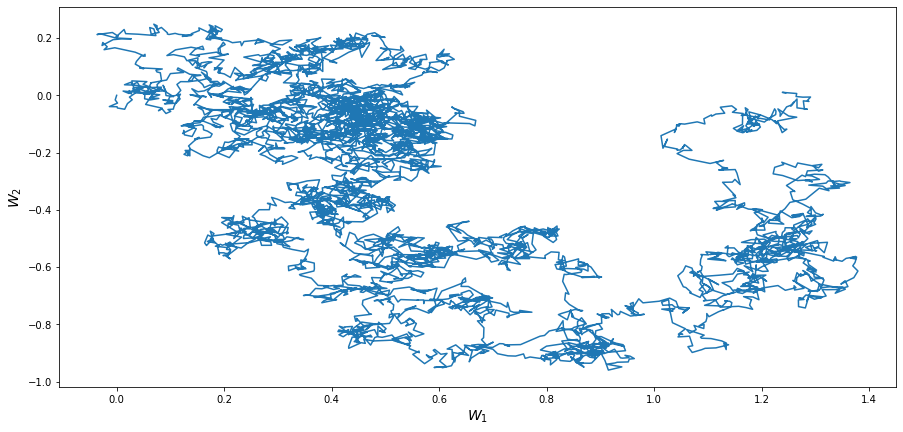

In [8]:
rho = 0
P = np.array([[1, rho], [rho,1]])
W = simulate_brownian(1,5000, P)
ax= plt.gca()
ax.plot(W[0,:],W[1,:]); # Plot X1 vs X2.
ax.set_xlabel('$W_1$',fontsize = 14)
ax.set_ylabel('$W_2$',fontsize = 14);

### A correlated Brownian motion

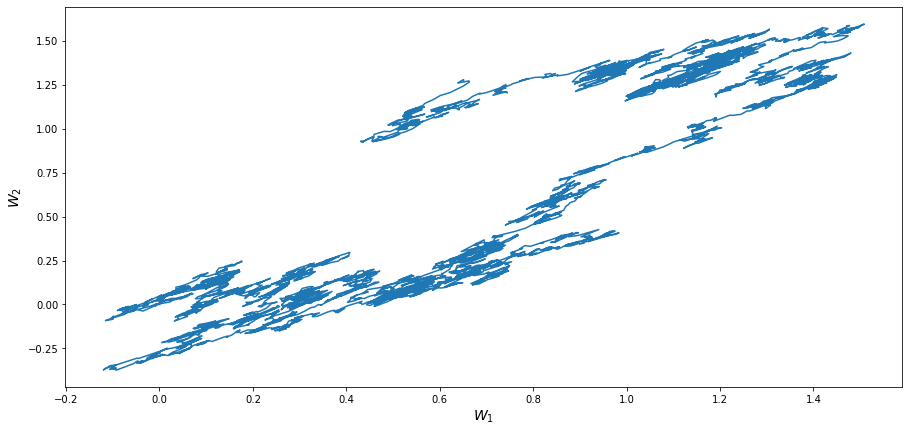

In [9]:
# Highly correlated Brownian Motion.
rho = 0.9
P = np.array([[1, rho], [rho,1]])
W = simulate_brownian(1,5000, P)
ax= plt.gca()
ax.plot(W[0,:],W[1,:]);
ax.set_xlabel('$W_1$',fontsize = 14)
ax.set_ylabel('$W_2$',fontsize = 14);

Note : The points lie on the diagonal line since it is highly correlated. If they were perfectly correlated then they would have been exactly on the diagonal line & X-coordinate would always equal y-coordinate.

### $n$-dimensional Stochastic Differential Equations

Let $W_t^d$ be a Brownian motion(d-dim Brownian motion). Let ${\mathbf a}:{{\mathbb R}^n \times {\mathbb R}} \to {\mathbb R}^n$
and $B:{{\mathbb R}^n \times {\mathbb R}} \to {\mathbb R^n} \times {\mathbb R}^d$ be functions. Let
$X^0 \in {\mathbb R}^n$ be given. Then we may
interpret "the solution of the SDE"
$$
d {\mathbf X}_t= {\mathbf a}({\mathbf X}_t, t) \, d t + 
B({\mathbf X}_t, t) d{\mathbf W}_{t}.
$$
as referring to the limit of the discrete time `Euler-Maruyama scheme`
$$
{\mathbf X}_{t+\delta t}= {\mathbf X}_t + {\mathbf a}({\mathbf X}_t, t) \, \delta t + 
\sqrt{\delta t} B({\mathbf X}_t, t) ({\mathbf W}_{t+\delta t}-{\mathbf W}_t)
$$

* Note that ${\mathbf a}$ is ${\mathbb R}^n$-vector valued so ${\mathbf a} \delta t$ is an $n$-vector.
* $B$ is $(n \times d)$-matrix valued and $({\mathbf W}_{t+\delta t}-{\mathbf W}_t)$
is a $d$-vector so that $B({\mathbf X}_t, t) ({\mathbf W}_{t+\delta t}-{\mathbf W}_t)$
is an $n$-vector. 
* $X_t$ is a vector of dimension n i.e. ${\mathbb R}^n$.

## Independent Geometric Brownian Motions
In the $2$-dimensional case we get $2$-dimensional `continuous time geometric Brownian motion`.
In the `Black-Scholes-Merton model`, Write ${\mathbf S}_t=(S^1_t,S^2_t)$. Take
$${\boldsymbol \mu} = \left(
    \begin{array}{c}
    \mu_1 \\
    \mu_2
    \end{array}
    \right) \qquad \sigma = \left(
    \begin{array}{cc}
    \sigma_1 & 0 \\
    0 & \sigma_2
    \end{array} 
    \right)
    \Longrightarrow \text{Uncorrelated} $$
in which we get two idependent  $1$-dimensional geometric Brownian motions.

$$
d S^1_t = S^1_t( \mu_1 \, dt + \sigma_1 d W^1_t )
$$
$$
d S^2_t = S^2_t( \mu_2 \, dt + \sigma_2 d W^2_t )
$$
If you are given the values of ${\mathbf W}_t$ then you can simulate an SDE using the
Euler-Maruyama scheme. If you are not given the values, you can simulate the increments
yourself:
$$\delta {\mathbf W}_t := \sqrt{\delta t}
\left(\begin{array}{c}
\epsilon^1_t \\
\vdots \\
\epsilon^d_t
\end{array}
\right)
$$
where the $\epsilon^i_t$ are independent standard normals.

### Simulating Correlated Stock Prices in Black-Scholes-Merton model.
To simulate the Black-Scholes-Merton model we may write

$$ {\mathbf S}_{t+\delta t} = {\mathbf S}_{t}  + {\mathbf S}_t \circ \left( {\boldsymbol \mu} \, \delta t + \sqrt{\delta t}\, \sigma \, 
\left(\begin{array}{c}
\epsilon^1_t \\
\vdots \\
\epsilon^d_t
\end{array}
\right)
\right)
$$
where $\sigma = \text{Cholesky decomposition(pseudo square root of Covariance Matrix.)}$

The mutliplcation between $\sigma$ and the vector of $\epsilon$ values is matrix multiplication.
This is written `@` in `numpy`. The elementwise multiplication $\circ$ is written as `*` in `numpy`.
We can approximately simulate stocks in the Black-Scholes-Merton model by using the Euler-Maruyama scheme
with a large number of steps.

In [11]:
def simulate_bsm_euler_maruyama( T, S0, mu, sigma, n_steps ):
    dt = T/n_steps
    n = S0.shape[0]
    S = np.zeros([n,n_steps+1])
    S[:,0]=S0
    epsilon = np.random.randn(n,n_steps)
    for i in range(0,n_steps):
        S[:,i+1]=S[:,i] + S[:,i] * (mu * dt + np.sqrt(dt) * sigma @ epsilon[:,i])
    return S

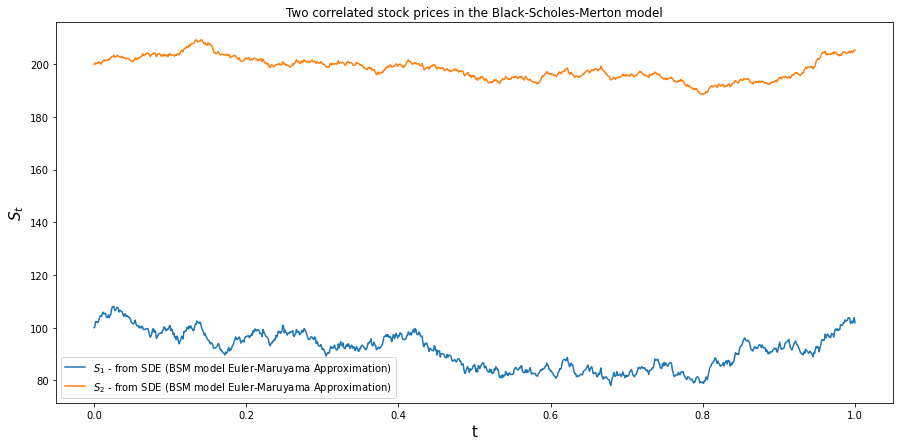

In [13]:
S0 = np.array([100, 200])
mu = np.array([0.04, 0.07])
sigma = np.array([[0.3, 0],[0.04,0.05]])
T = 1
n_steps = 1000
S = simulate_bsm_euler_maruyama(T,S0,mu,sigma,n_steps)

t = np.linspace(0,T,n_steps+1)
ax = plt.gca()
ax.plot(t,S[0,:],label='$S_1$ - from SDE (BSM model Euler-Maruyama Approximation)');
ax.plot(t,S[1,:],label='$S_2$ - from SDE (BSM model Euler-Maruyama Approximation)');
plt.xlabel('t',fontsize = 15)
plt.ylabel('$S_t$',fontsize = 15)
ax.set_title('Two correlated stock prices in the Black-Scholes-Merton model');
ax.legend();

Lets now simulate 1000 samples of the Euler-Maruyama approximation of a geometric Brownian motion with the parameter values
$$
{\boldsymbol \mu} = \left( \begin{array}{c}
0.03 \\
0.05
\end{array} \right), \qquad        
\sigma = \left( \begin{array}{cc}
0.1 & 0 \\
0.05 & 0.2
\end{array} \right),  \qquad
S_0 = \left( \begin{array}{c}
100 \\
150
\end{array} \right)
$$
over a time period of $10$ years using $100$ steps in the approximation and plot a scatter plot of $S^1_{10}$ against $S^2_{10}$.

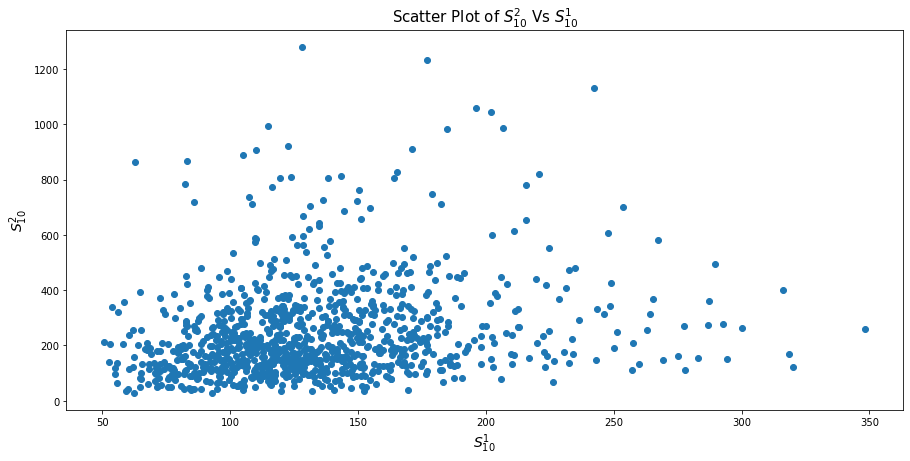

In [20]:
sigma = np.array([[0.1,0],[0.05,0.2]])
mu = np.array([0.03, 0.05])
S0 = np.array([100, 150])
n_samples = 1000
final_S = np.zeros((n_samples,2))
for i in range(0,n_samples):
    simulated = simulate_bsm_euler_maruyama(10, S0, mu, sigma, 100)
    final_S[i,:] = simulated[:,-1]
plt.scatter( final_S[:,0], final_S[:,1]);
plt.xlabel('$S^{1}_{10}$',fontsize = 14);
plt.ylabel('$S^{2}_{10}$', fontsize = 14);
plt.title('Scatter Plot of $S^{2}_{10}$ Vs $S^{1}_{10}$', fontsize = 15);

Lets repeat this simulation with larger sample size of $10000$ samples and estimate the covariance of $S^1_{10}$ and $S^2_{10}$.

In [30]:
n_samples = 10000
final_S = np.zeros((n_samples,2))
for i in range(0,n_samples):
    simulated = simulate_bsm_euler_maruyama(10, S0, mu, sigma, 100)
    final_S[i,:] = simulated[:,-1]
covariance_matrix = np.cov( final_S[:,0], final_S[:,1] )
covariance_estimate = covariance_matrix[0,1]  # Selects covariance between the 1st and 2nd assets in the matrix. 
print( covariance_estimate)

1570.4271719300475
